<a href="https://colab.research.google.com/github/NestorRl/SeminarioPI/blob/master/clesson3_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [14]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

# Testing an existing classifier

In [0]:
IMAGE_SIZE = (224, 224)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

In [0]:
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

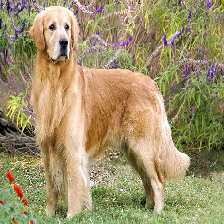

In [18]:
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image

In [19]:
test_image = np.array(test_image)/255.0
test_image.shape

(224, 224, 3)

In [20]:
result = classifier.predict(test_image[np.newaxis, ...])
result.shape

(1, 1001)

In [21]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

208

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

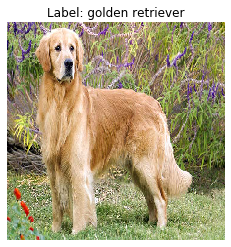

In [23]:
predicted_class_name = imagenet_labels[predicted_class]

plt.axis('off')
plt.title("Label: " + predicted_class_name, color = 'black')
plt.imshow(test_image)
plt.show()

# Transfer Learning

## Build the dataset

In [0]:
class_names = ['captain_america','batman']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'captain_america')  
train_im_dir = os.path.join(train_dir, 'batman')  
validation_ca_dir = os.path.join(validation_dir, 'captain_america') 
validation_im_dir = os.path.join(validation_dir, 'batman')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [27]:
queries = ['chris evans','avengers','uniform','mcu','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='captain america '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=captain america chris evans&source=lnms&tbm=isch
Total Time : 0:00:03.007777
Invalid image:  14.jpg cannot identify image file '/content/Images/14.jpg'
Invalid image:  56.jpg cannot write mode RGBA as JPEG
Invalid image:  71.jpg cannot write mode P as JPEG
Invalid image:  87.jpg cannot identify image file '/content/Images/87.jpg'
Invalid image:  40.jpg cannot write mode P as JPEG
Invalid image:  72.jpg cannot write mode RGBA as JPEG
Invalid image:  36.jpg cannot write mode P as JPEG
Invalid image:  2.jpg cannot identify image file '/content/Images/2.jpg'
https://www.google.co.in/search?q=captain america avengers&source=lnms&tbm=isch
Total Time : 0:00:00.000359
Invalid image:  14.jpg cannot identify image file '/content/Images/14.jpg'
Invalid image:  56.jpg cannot write mode RGBA as JPEG
Invalid image:  71.jpg cannot write mode P as JPEG
Invalid image:  87.jpg cannot identify image file '/content/Images/87.jpg'
Invalid image:  40.jpg cannot write mode P

In [28]:
queries = ['ben affleck','justice league','suit','dc','cosplay']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='batman '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=batman ben affleck&source=lnms&tbm=isch
Total Time : 0:00:03.410950
Invalid image:  52.jpg cannot identify image file '/content/Images/52.jpg'
Invalid image:  41.jpg cannot write mode RGBA as JPEG
Invalid image:  54.jpg cannot write mode RGBA as JPEG
https://www.google.co.in/search?q=batman justice league&source=lnms&tbm=isch
Total Time : 0:00:05.583330
Invalid image:  56.jpg cannot write mode P as JPEG
Invalid image:  77.jpg cannot write mode RGBA as JPEG
Invalid image:  50.jpg cannot identify image file '/content/Images/50.jpg'
Invalid image:  85.jpg cannot write mode RGBA as JPEG
Invalid image:  11.jpg cannot write mode RGBA as JPEG
Invalid image:  62.jpg cannot identify image file '/content/Images/62.jpg'
https://www.google.co.in/search?q=batman suit&source=lnms&tbm=isch
Total Time : 0:00:00.000357
Invalid image:  56.jpg cannot write mode P as JPEG
Invalid image:  77.jpg cannot write mode RGBA as JPEG
Invalid image:  50.jpg cannot identify image fi

In [29]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Captain America images:', len(os.listdir(train_ca_dir)))
print('total training batman images:', len(os.listdir(train_im_dir)))

print('total validation Captain America images:', len(os.listdir(validation_ca_dir)))
print('total validation batman images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Captain America images: 403
total training batman images: 423
total validation Captain America images: 48
total validation batman images: 50
--
Total training images: 826
Total validation images: 98


## Using the dataset

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [31]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 826 images belonging to 2 classes.


In [32]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 98 images belonging to 2 classes.


## Testing the classifier

In [0]:
image_batch, labels_batch = next(train_data_gen)

In [34]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [35]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['crutch', 'cuirass', 'bulletproof vest', 'stage', 'comic book',
       'suit', 'shield', 'Arabian camel', 'breastplate', 'harp',
       'beer bottle', 'cuirass', 'breastplate', 'seat belt', 'cuirass',
       'cuirass', 'bulletproof vest', 'breastplate', 'toyshop', 'cloak',
       'military uniform', 'web site', 'toyshop', 'steel drum',
       'breastplate', 'fountain', 'military uniform', 'cuirass',
       'bulletproof vest', 'cuirass', 'military uniform', 'breastplate'],
      dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

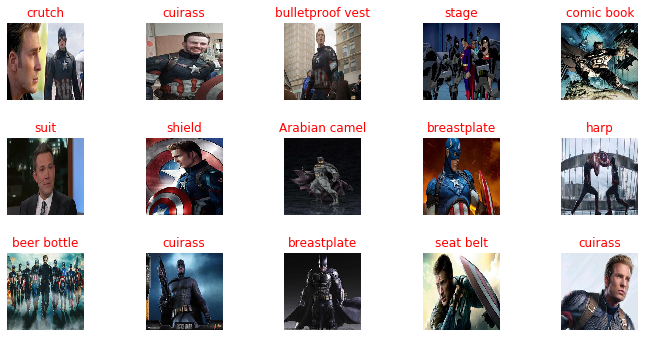

In [37]:
plot_images(image_batch, labels_batch, predicted_class_names)

## Downloading headless model

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [40]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

## Adding a classification head

In [42]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


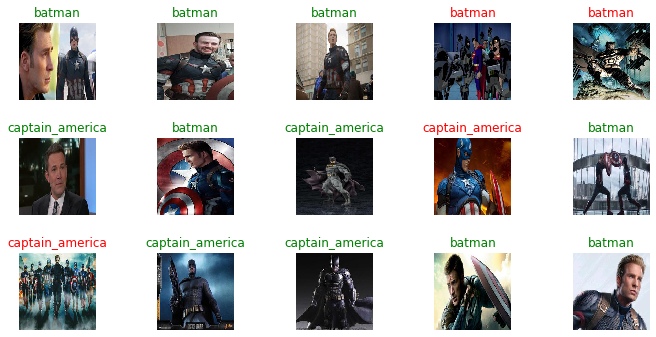

In [43]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Train the model

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 37s 7s/step - loss: 0.7279 - accuracy: 0.6753 - val_loss: 0.4237 - val_accuracy: 0.8367
Epoch 2/5
5/5 [==============================] - 33s 7s/step - loss: 0.2518 - accuracy: 0.8766 - val_loss: 0.3314 - val_accuracy: 0.8673
Epoch 3/5
5/5 [==============================] - 34s 7s/step - loss: 0.2366 - accuracy: 0.9312 - val_loss: 0.8308 - val_accuracy: 0.8163
Epoch 4/5
5/5 [==============================] - 34s 7s/step - loss: 0.3672 - accuracy: 0.8875 - val_loss: 0.2762 - val_accuracy: 0.8571
Epoch 5/5
5/5 [==============================] - 34s 7s/step - loss: 0.1815 - accuracy: 0.9500 - val_loss: 0.2519 - val_accuracy: 0.8878


## Check results

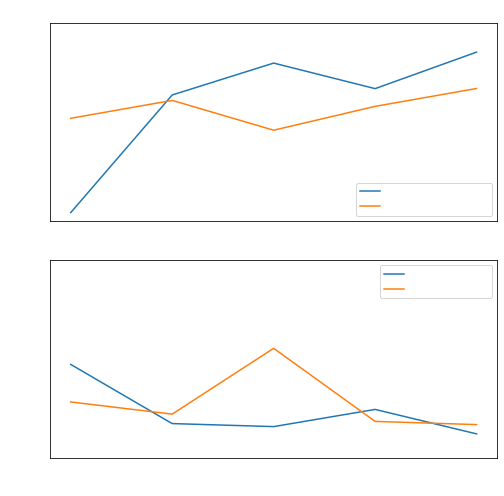

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

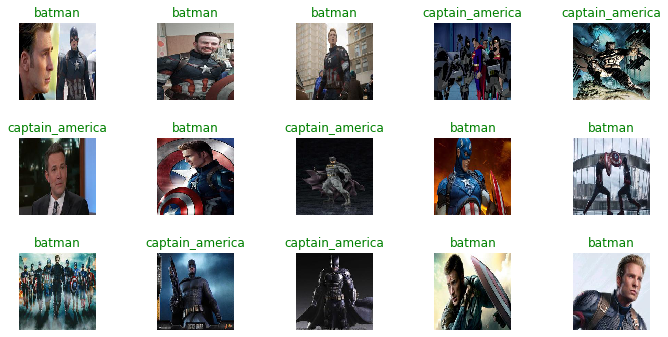

In [47]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

##Application base model

In [48]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

94674944/94668760 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False

In [50]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [51]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 43s 9s/step - loss: 0.7714 - accuracy: 0.6125 - val_loss: 0.4945 - val_accuracy: 0.7857
Epoch 2/5
5/5 [==============================] - 40s 8s/step - loss: 0.2275 - accuracy: 0.9187 - val_loss: 0.1859 - val_accuracy: 0.9286
Epoch 3/5
5/5 [==============================] - 40s 8s/step - loss: 0.1887 - accuracy: 0.9312 - val_loss: 0.1947 - val_accuracy: 0.9490
Epoch 4/5
5/5 [==============================] - 40s 8s/step - loss: 0.2479 - accuracy: 0.8875 - val_loss: 0.1440 - val_accuracy: 0.9388
Epoch 5/5
5/5 [==============================] - 40s 8s/step - loss: 0.0669 - accuracy: 0.9812 - val_loss: 0.2413 - val_accuracy: 0.9388


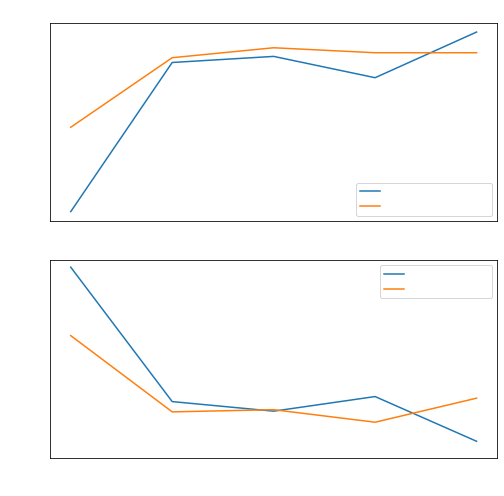

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

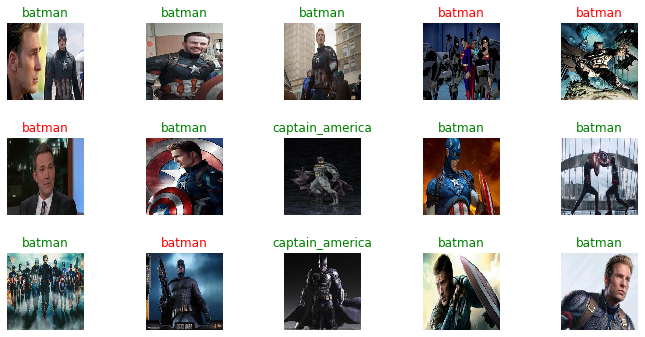

In [55]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

## Fine tuning

In [0]:
base_model.trainable = True

In [57]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


Number of layers in the base model:  190


In [58]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [59]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 5/10
5/5 [==============================] - 56s 11s/step - loss: 0.4608 - accuracy: 0.9000 - val_loss: 0.8208 - val_accuracy: 0.8776
Epoch 6/10
5/5 [==============================] - 52s 10s/step - loss: 0.3809 - accuracy: 0.9062 - val_loss: 3.4921 - val_accuracy: 0.8571
Epoch 7/10
5/5 [==============================] - 52s 10s/step - loss: 0.2257 - accuracy: 0.9312 - val_loss: 3.6972 - val_accuracy: 0.8367
Epoch 8/10
5/5 [==============================] - 52s 10s/step - loss: 0.2077 - accuracy: 0.9062 - val_loss: 2.4364 - val_accuracy: 0.8980
Epoch 9/10
5/5 [==============================] - 52s 10s/step - loss: 0.0736 - accuracy: 0.9812 - val_loss: 7.9652 - val_accuracy: 0.8265
Epoch 10/10
5/5 [==============================] - 52s 10s/step - loss: 0.0529 - accuracy: 0.9812 - val_loss: 63.8709 - val_accuracy: 0.5102


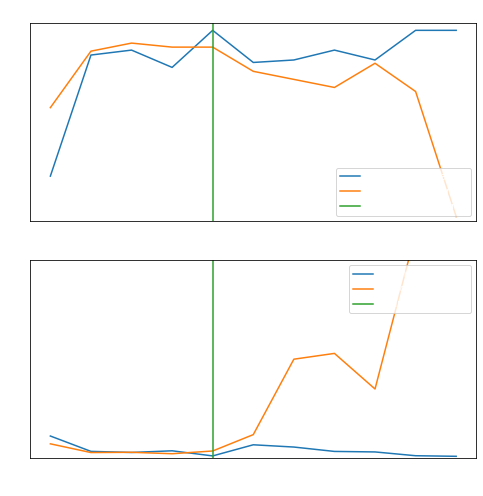

In [60]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

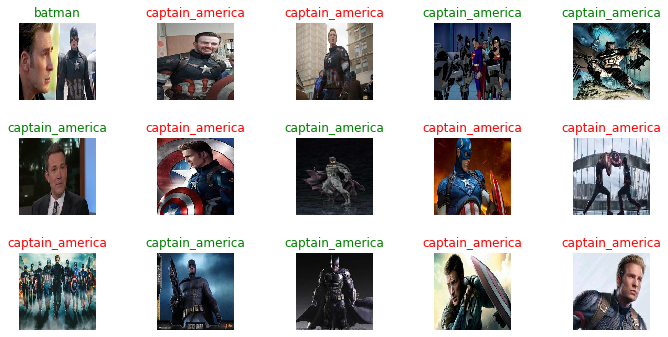

In [61]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)